d-sandbox
<div style="text-align: center; line-height: 0; padding-top: 9px;">
  <img src="https://databricks.com/wp-content/uploads/2018/03/db-academy-rgb-1200px.png" alt="Databricks Learning" style="width: 600px; height: 163px">
</div>

# Linear Regression

Before you attempt to throw a neural network at a problem, you want to establish a __baseline model__. Often, this will be a simple model, such as linear regression. Once we establish a baseline, then we can get started with Deep Learning.

## ![Spark Logo Tiny](https://files.training.databricks.com/images/105/logo_spark_tiny.png) In this lesson you:<br>
 - Build a linear regression model using Sklearn and reimplement it in Keras 
 - Modify # of epochs
 - Visualize loss

Let's start by making a simple array of features, and the label we are trying to predict is y = 2*X + 1.

In [4]:
import numpy as np

np.set_printoptions(suppress=True)

X = np.arange(-10, 11).reshape((21,1))
y = 2*X + 1

list(zip(X, y))

Out[1]: 
[(array([-10]), array([-19])),
 (array([-9]), array([-17])),
 (array([-8]), array([-15])),
 (array([-7]), array([-13])),
 (array([-6]), array([-11])),
 (array([-5]), array([-9])),
 (array([-4]), array([-7])),
 (array([-3]), array([-5])),
 (array([-2]), array([-3])),
 (array([-1]), array([-1])),
 (array([0]), array([1])),
 (array([1]), array([3])),
 (array([2]), array([5])),
 (array([3]), array([7])),
 (array([4]), array([9])),
 (array([5]), array([11])),
 (array([6]), array([13])),
 (array([7]), array([15])),
 (array([8]), array([17])),
 (array([9]), array([19])),
 (array([10]), array([21]))]

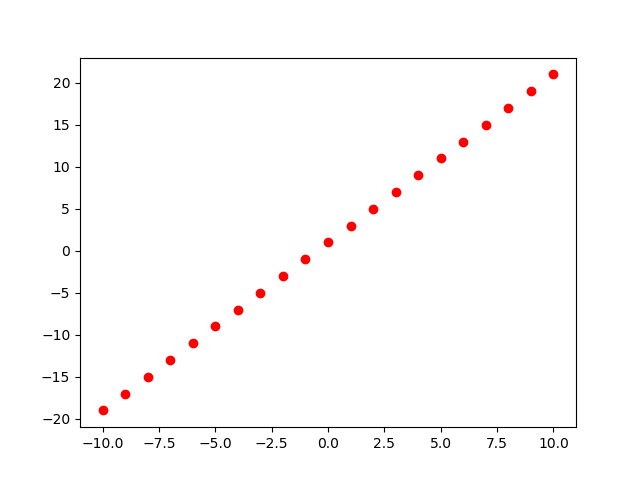

In [5]:
import matplotlib.pyplot as plt
plt.plot(X, y, 'ro')
display(plt.show())

Use Sklearn to establish our baseline (for simplicity, we are using the same dataset for training and testing in this toy example, but we will change that later).

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X, y)

Out[3]: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
from sklearn.metrics import mean_squared_error

y_pred = lr.predict(X)
mse = mean_squared_error(y, y_pred)
print(mse)

7.005836134462796e-30

### Visualize Predictions

In [10]:
plt.plot(X, y_pred)
display(plt.show())

## Keras

Now that we have established a baseline model, let's see if we can build a fully-connected neural network that can meet or exceed our linear regression model. A fully-connected neural network is simply a set of matrix multiplications followed by some non-linear function (to be discussed later). 

[Keras](https://keras.io/) is a high-level API to build neural networks, that supports the following backends: Tensorflow, Theano, and CNTK. 

It was released by François Chollet in 2015, and is now the official high-level API of Tensorflow. Keras has over 250,000 users, and we will primarily use Keras in this course.

##### Steps to build a Keras model
0. Define Network
0. Compile Network
0. Fit Network
0. Evaluate Network
0. Make Predictions

# 1. Define a N-Layer Network

Here, we need to specify the dimensions of our input and output layers. When we say something is an N-layer neural network, we count all of the layers except the input layer. The diagram below demonstrates a 3-layer neural network. 

A special case of neural network with no hidden layers and no non-linearities is actually just linear regression :).

![](https://files.training.databricks.com/images/Neural_network.svg)

For the next few labs, we will use the [Sequential model](https://keras.io/getting-started/sequential-model-guide/) from Keras.

In [13]:
import tensorflow as tf
tf.set_random_seed(42) # For reproducibility
np.random.seed(0)

from keras.models import Sequential
from keras.layers import Dense

# The Sequential model is a linear stack of layers.
model = Sequential()

model.add(Dense(units=1, input_dim=1, activation='linear'))

We can check the model definition by calling `.summary()`. Note the two parameters - any thoughts on why there are TWO?

In [15]:
model.summary()

_________________________________________________________________
Layer (type) Output Shape Param # 
=================================================================
dense_2 (Dense) (None, 1) 2 
=================================================================
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________

# 2. Compile a Network

To [compile](https://keras.io/getting-started/sequential-model-guide/#compilation) the network, we need to specify the loss function and which optimizer to use. We'll talk more about optimizers and loss metrics in the next lab.

For right now, we will use `mse` (mean squared error) for our loss function, and the `adam` optimizer.

In [17]:
model.compile(loss='mse',
              optimizer='adam')

# 3. Fit a Network

Let's [train](https://keras.io/getting-started/sequential-model-guide/#training) our model on X and y.

Epoch 1/1

21/21 [==============================] - 0s 17ms/step - loss: 69.0204
Out[11]: <keras.callbacks.History at 0x7fa77e083d68>

And take a look at the predictions.

In [21]:
keras_pred = model.predict(X)
keras_pred

Out[12]: 
array([[-6.388782 ],
 [-5.7498035],
 [-5.1108255],
 [-4.4718475],
 [-3.832869 ],
 [-3.193891 ],
 [-2.5549128],
 [-1.9159344],
 [-1.2769563],
 [-0.6379782],
 [ 0.001 ],
 [ 0.6399782],
 [ 1.2789564],
 [ 1.9179345],
 [ 2.5569127],
 [ 3.195891 ],
 [ 3.834869 ],
 [ 4.4738474],
 [ 5.1128254],
 [ 5.7518034],
 [ 6.390782 ]], dtype=float32)

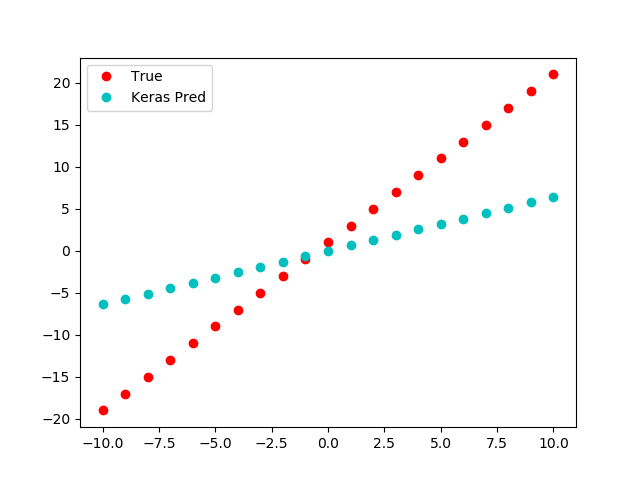

In [22]:
def kerasPredPlot(keras_pred):
  plt.clf()
  plt.plot(X, y, 'ro', label='True')
  plt.plot(X, keras_pred, 'co', label='Keras Pred')
  plt.legend(numpoints=1)
  display(plt.show())
  
kerasPredPlot(keras_pred)

What went wrong?? Turns out there a few more hyperparameters we need to set. Let's take a look at [Keras documentation](https://keras.io/models/sequential/).

`epochs` specifies how many passes you want over your entire dataset. Let's increase the number of epochs, and look at how the MSE decreases.

Here we are capturing the output of model.fit() as it returns a History object, which keeps a record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

In [24]:
history = model.fit(X, y, epochs=20) 

Epoch 1/20

21/21 [==============================] - 0s 61us/step - loss: 68.9186
Epoch 2/20

21/21 [==============================] - 0s 44us/step - loss: 68.8169
Epoch 3/20

21/21 [==============================] - 0s 43us/step - loss: 68.7152
Epoch 4/20

21/21 [==============================] - 0s 42us/step - loss: 68.6135
Epoch 5/20

21/21 [==============================] - 0s 46us/step - loss: 68.5120
Epoch 6/20

21/21 [==============================] - 0s 42us/step - loss: 68.4106
Epoch 7/20

21/21 [==============================] - 0s 41us/step - loss: 68.3092
Epoch 8/20

21/21 [==============================] - 0s 40us/step - loss: 68.2079
Epoch 9/20

21/21 [==============================] - 0s 40us/step - loss: 68.1068
Epoch 10/20

21/21 [==============================] - 0s 40us/step - loss: 68.0057
Epoch 11/20

21/21 [==============================] - 0s 40us/step - loss: 67.9046
Epoch 12/20

21/21 [==============================] - 0s 41us/step - loss: 67.8037
Epoch 13/20

21/21 [==============================] - 0s 43us/step - loss: 67.7029
Epoch 14/20

21/21 [==============================] - 0s 40us/step - loss: 67.6021
Epoch 15/20

21/21 [==============================] - 0s 40us/step - loss: 67.5015
Epoch 16/20

21/21 [==============================] - 0s 40us/step - loss: 67.4009
Epoch 17/20

21/21 [==============================] - 0s 43us/step - loss: 67.3005
Epoch 18/20

21/21 [==============================] - 0s 86us/step - loss: 67.2001
Epoch 19/20

21/21 [==============================] - 0s 44us/step - loss: 67.0998
Epoch 20/20

21/21 [==============================] - 0s 41us/step - loss: 66.9997

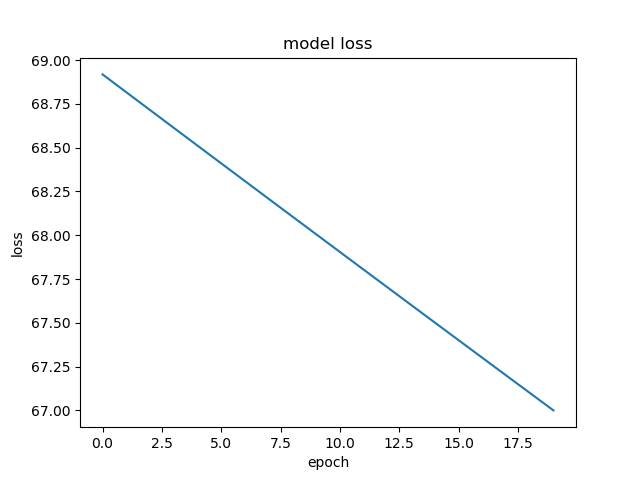

In [25]:
import matplotlib.pyplot as plt

def viewModelLoss():
  plt.clf()
  plt.plot(history.history['loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  display(plt.show())
viewModelLoss()

Let's try increasing the epochs even more.

In [27]:
history = model.fit(X, y, epochs=4000)

Epoch 1/4000

21/21 [==============================] - 0s 58us/step - loss: 66.8996
Epoch 2/4000

21/21 [==============================] - 0s 45us/step - loss: 66.7996
Epoch 3/4000

21/21 [==============================] - 0s 43us/step - loss: 66.6997
Epoch 4/4000

21/21 [==============================] - 0s 43us/step - loss: 66.6000
Epoch 5/4000

21/21 [==============================] - 0s 41us/step - loss: 66.5003
Epoch 6/4000

21/21 [==============================] - 0s 44us/step - loss: 66.4007
Epoch 7/4000

21/21 [==============================] - 0s 44us/step - loss: 66.3013
Epoch 8/4000

21/21 [==============================] - 0s 43us/step - loss: 66.2019
Epoch 9/4000

21/21 [==============================] - 0s 41us/step - loss: 66.1026
Epoch 10/4000

21/21 [==============================] - 0s 42us/step - loss: 66.0035
Epoch 11/4000

21/21 [==============================] - 0s 94us/step - loss: 65.9044
Epoch 12/4000

21/21 [==============================] - 0s 45us/step - loss: 65.8055
Epoch 13/4000

21/21 [==============================] - 0s 46us/step - loss: 65.7066
Epoch 14/4000

21/21 [==============================] - 0s 42us/step - loss: 65.6079
Epoch 15/4000

21/21 [==============================] - 0s 43us/step - loss: 65.5092
Epoch 16/4000

21/21 [==============================] - 0s 45us/step - loss: 65.4107
Epoch 17/4000

21/21 [==============================] - 0s 46us/step - loss: 65.3123
Epoch 18/4000

21/21 [==============================] - 0s 44us/step - loss: 65.2140
Epoch 19/4000

21/21 [==============================] - 0s 50us/step - loss: 65.1158
Epoch 20/4000

21/21 [==============================] - 0s 45us/step - loss: 65.0177
Epoch 21/4000

21/21 [==============================] - 0s 43us/step - loss: 64.9197
Epoch 22/4000

21/21 [==============================] - 0s 41us/step - loss: 64.8218
Epoch 23/4000

21/21 [==============================] - 0s 43us/step - loss: 64.7240
Epoch 24/4000

21/21 [==============================] - 0s 46us/step - loss: 64.6263
Epoch 25/4000

21/21 [==============================] - 0s 43us/step - loss: 64.5288
Epoch 26/4000

21/21 [==============================] - 0s 46us/step - loss: 64.4313
Epoch 27/4000

21/21 [==============================] - 0s 41us/step - loss: 64.3340
Epoch 28/4000

21/21 [==============================] - 0s 44us/step - loss: 64.2367
Epoch 29/4000

21/21 [==============================] - 0s 43us/step - loss: 64.1396
Epoch 30/4000

21/21 [==============================] - 0s 40us/step - loss: 64.0426
Epoch 31/4000

21/21 [==============================] - 0s 42us/step - loss: 63.9457
Epoch 32/4000

21/21 [==============================] - 0s 44us/step - loss: 63.8489
Epoch 33/4000

21/21 [==============================] - 0s 40us/step - loss: 63.7522
Epoch 34/4000

21/21 [==============================] - 0s 42us/step - loss: 63.6556
Epoch 35/4000

21/21 [==============================] - 0s 43us/step - loss: 63.5591
Epoch 36/4000

21/21 [==============================] - 0s 44us/step - loss: 63.4628
Epoch 37/4000

21/21 [==============================] - 0s 41us/step - loss: 63.3665
Epoch 38/4000

21/21 [==============================] - 0s 43us/step - loss: 63.2704
Epoch 39/4000

21/21 [==============================] - 0s 43us/step - loss: 63.1743
Epoch 40/4000

21/21 [==============================] - 0s 42us/step - loss: 63.0784
Epoch 41/4000

21/21 [==============================] - 0s 45us/step - loss: 62.9826
Epoch 42/4000

21/21 [==============================] - 0s 46us/step - loss: 62.8868
Epoch 43/4000

21/21 [==============================] - 0s 42us/step - loss: 62.7912
Epoch 44/4000

21/21 [==============================] - 0s 44us/step - loss: 62.6957
Epoch 45/4000

21/21 [==============================] - 0s 44us/step - loss: 62.6003
Epoch 46/4000

21/21 [==============================] - 0s 43us/step - loss: 62.5051
Epoch 47/4000

21/21 [==============================] - 0s 43us/step - loss: 62.4099
Epoch 48/4000


Let's inspect how our model decreased the loss (MSE) as the number of epochs increases.

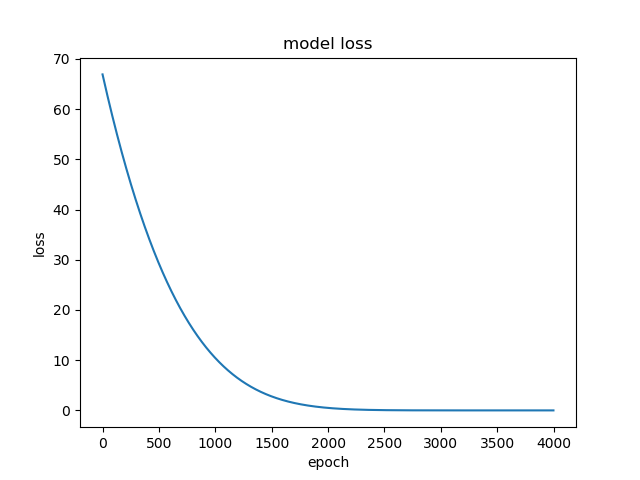

In [29]:
viewModelLoss()

Extract model weights. Wahoo! We were able to approximate y=2*X + 1 quite well! If we trained for some more epochs, we should be able to approximate this function exactly (at risk of overfitting of course).

In [31]:
print(model.get_weights())
predicted_w = model.get_weights()[0][0][0]
predicted_b = model.get_weights()[1][0]

print("predicted_w: ", predicted_w)
print("predicted_b: ", predicted_b)

[array([[1.999913]], dtype=float32), array([0.99999714], dtype=float32)]
predicted_w: 1.999913
predicted_b: 0.99999714

# 4. Evaluate Network

As mentioned previously, we want to make sure our neural network can beat our benchmark.

In [33]:
model.evaluate(X, y) # Prints loss value & metrics values for the model in test mode (both are MSE here)

21/21 [==============================] - 0s 2ms/step
Out[19]: 2.7771523036790313e-07

# 5. Make Predictions

In [35]:
keras_pred1 = model.predict(X)
keras_pred1

Out[20]: 
array([[-18.999134 ],
 [-16.999218 ],
 [-14.999307 ],
 [-12.999393 ],
 [-10.99948 ],
 [ -8.999568 ],
 [ -6.999655 ],
 [ -4.9997416 ],
 [ -2.9998288 ],
 [ -0.99991584],
 [ 0.99999714],
 [ 2.99991 ],
 [ 4.999823 ],
 [ 6.999736 ],
 [ 8.999649 ],
 [ 10.999562 ],
 [ 12.999475 ],
 [ 14.999388 ],
 [ 16.999302 ],
 [ 18.999214 ],
 [ 20.999126 ]], dtype=float32)

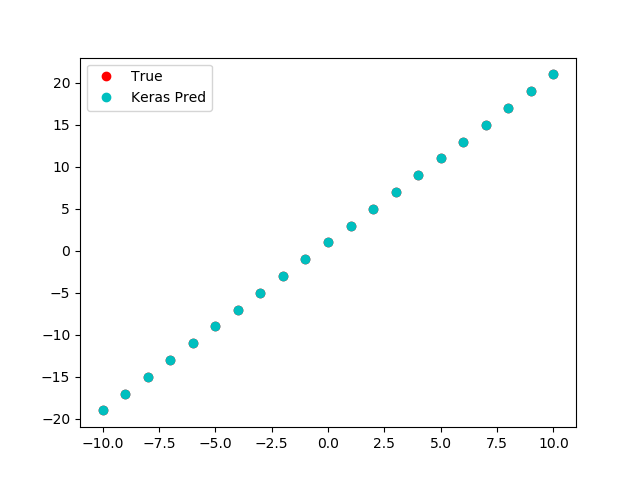

In [36]:
kerasPredPlot(keras_pred1)

Alright, this was a very simple, contrived example. Let's go ahead and make this a bit more interesting in the next lab!

-sandbox
&copy; 2019 Databricks, Inc. All rights reserved.<br/>
Apache, Apache Spark, Spark and the Spark logo are trademarks of the <a href="http://www.apache.org/">Apache Software Foundation</a>.<br/>
<br/>
<a href="https://databricks.com/privacy-policy">Privacy Policy</a> | <a href="https://databricks.com/terms-of-use">Terms of Use</a> | <a href="http://help.databricks.com/">Support</a>